In [1]:
import numpy as np
import pandas as pd
import HierarchicalClusterTree as hct

### Let's load an example dataset

In [2]:
# 130,408 cells each with cluster labels at 7 levels of a hierarchy
labelmat = np.load('example/example_labelmat.npy', allow_pickle=True)

# Embedding of all 130,488 cells in a 2d dimensional space
embedding = np.load('example/example_embedding.npy')

### Convert to label matrix to a tree

In [3]:
# Convert the label matrix to a tree
print("Converting label matrix to cluster tree...")
cluster_tree = hct.HierTreeCluster.from_labelmat(labelmat, embedding=embedding, name='root')

# Root node of the tree is returned
print(cluster_tree)

Converting label matrix to cluster tree...
HierTreeCluster(name='root', level=0, num_members=130408, supercluster='None', subclusters=[C2-2, C2-1])


### Prune Tree using a custom check function

In [4]:
from copy import deepcopy

# Create a copy of the tree
pruned_tree = deepcopy(cluster_tree)

In [6]:
# Define a function to compare two clusters and return a bool. True = keep, False = merge
def check_func(clusterA: hct.HierTreeCluster, clusterB: hct.HierTreeCluster) -> bool:
    
    # Example check: both cluster must have more than 100 members
    is_valid = (len(clusterA.members) > 60) and (len(clusterB.members) > 60)
    
    if not is_valid:
        print(f'Merging {clusterA.name} and {clusterB.name}')
    
    return is_valid

print("Pruning cluster tree based on provided conditions...")
# hct.prune_tree(pruned_tree, check_func) # Inplace operation
pruned_tree.prune(check_func)

Pruning cluster tree based on provided conditions...
Merging C7-4 and C7-5
Merging C7-4_5 and C7-3
Merging C25-21 and C25-20
Merging C25-18 and C25-17
Merging C25-21_20 and C25-19
Merging C25-21_20_19 and C25-18_17
Merging C66-54 and C66-52
Merging C66-60 and C66-59
Merging C66-54_52 and C66-58
Merging C66-54_52_58 and C66-57
Merging C66-54_52_58_57 and C66-51
Merging C66-54_52_58_57_51 and C66-56
Merging C66-54_52_58_57_51_56 and C66-60_59
Merging C66-54_52_58_57_51_56_60_59 and C66-53
Merging C66-55 and C66-54_52_58_57_51_56_60_59_53
Merging C185-142 and C185-144
Merging C185-165 and C185-146
Merging C185-142_144 and C185-139
Merging C185-170 and C185-171
Merging C185-142_144_139 and C185-132
Merging C185-137 and C185-163
Merging C185-135 and C185-168
Merging C185-138 and C185-147
Merging C185-143 and C185-138_147
Merging C185-160 and C185-165_146
Merging C185-160_165_146 and C185-137_163
Merging C185-170_171 and C185-133
Merging C185-135_168 and C185-134
Merging C185-142_144_139_132

### Convert Tree back into a labelmatrix

In [7]:
# Convert the tree back to a label matrix
print("Converting cluster tree back to label matrix...")
pruned_labelmat = pruned_tree.to_labelmat(keep_root=False)
pruned_labelmat


Converting cluster tree back to label matrix...


array([['C2-1', 'C7-2', 'C25-10_16', ..., 'C185-66', 'C286-97',
        'C465-158'],
       ['C2-1', 'C7-1', 'C25-2', ..., 'C185-16', 'C286-19', 'C465-32'],
       ['C2-1', 'C7-2', 'C25-10_16', ..., 'C185-79', 'C286-126',
        'C465-208'],
       ...,
       ['C2-1', 'C7-2', 'C25-10_16', ..., 'C185-67', 'C286-101',
        'C465-166'],
       ['C2-1', 'C7-1', 'C25-2', ..., 'C185-11', 'C286-12', 'C465-20'],
       ['C2-1', 'C7-2', 'C25-10_16', ..., 'C185-80_130', 'C286-128_197',
        'C465-210_321']], dtype=object)

### Visualize the Tree using ETE3

In [8]:
# Convert the tree to newick tree format
print("Converting cluster tree to newick format...")
cluster_newick = cluster_tree.to_newick()
# print(cluster_newick)
print("Converting pruned tree to newick format...")
pruned_newick = pruned_tree.to_newick()
# print(pruned_newick)

Converting cluster tree to newick format...
Converting pruned tree to newick format...


#### Tree prior to pruning

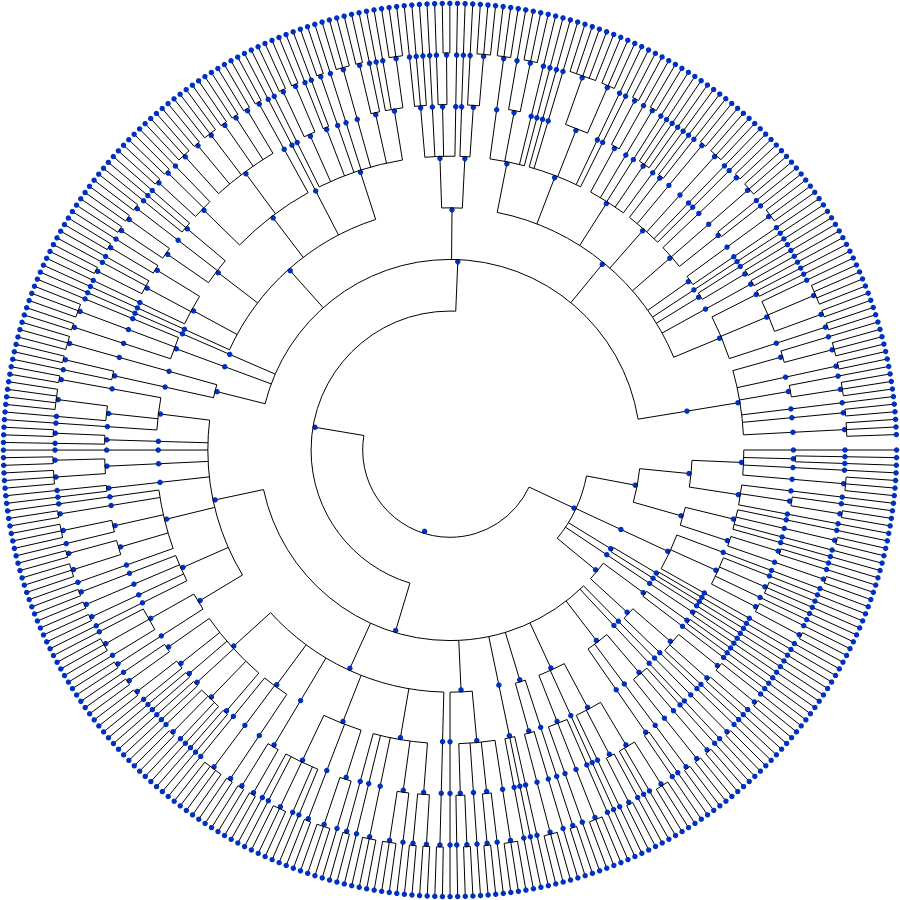

In [9]:
from ete3 import Tree, TreeStyle, NodeStyle

ts = TreeStyle()
ts.show_leaf_name = False
ts.show_branch_length = False
ts.show_scale = False
ts.mode = "c"  # Circular layout

cluster_tree = Tree(cluster_newick, format=8)

cluster_tree.render("%%inline", tree_style=ts, h=900, w=900)

#### Tree after pruning

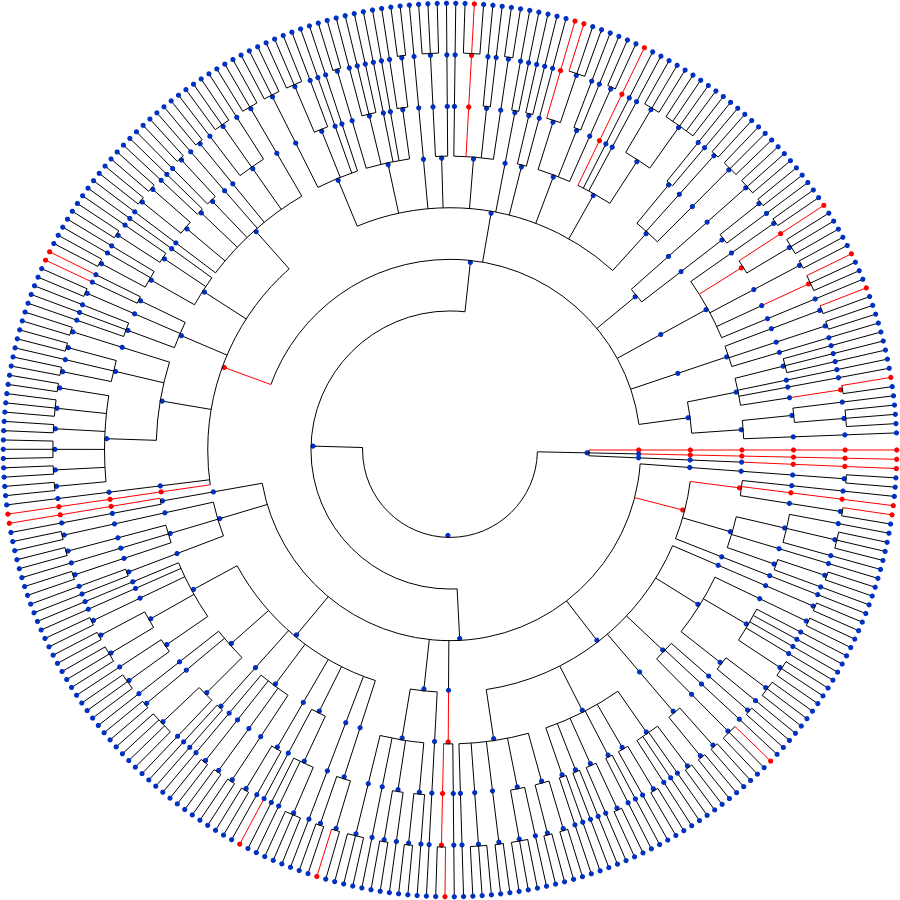

In [10]:
pruned_tree = Tree(pruned_newick, format=8)

ts = TreeStyle()
ts.show_leaf_name = False
ts.show_branch_length = False
ts.show_scale = False
ts.mode = "c"  # Circular layout

for node in pruned_tree.traverse():
    if node.name.count('_') >= 1: # Merged clusters have an _ joining them
        style = NodeStyle()
        style["fgcolor"] = "red"   # Node color (effectively invisible)
        style["hz_line_color"] = 'red'  # Horizontal line color
        node.set_style(style)

pruned_tree.render("%%inline", tree_style=ts, h=900, w=900)